# Decision Trees


# Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set()

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz(
#         tree_clf,
#         out_file="iris_tree.dot",
#         feature_names=iris.feature_names[2:],
#         class_names=iris.target_names,
#         rounded=True,
#         filled=True
# )


In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

## Hyperparameters
* `max_depth` is maximum depth of tree. The algorithm continue making tree until reach this depth.
* `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, and `max_leaf_nodes` also can use for stoping the algorithm. 
* `max_feature` is used to set number of features to be check, but if it was None the algorithm check all of the features.
* `presort` can increase speed of algorithm, but it got a little slow with large number of training set.

__Increasing min_* and decreasing max_* will regulize our train more__


# Regression

In [5]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# Excersice 7-8

In [6]:
from sklearn.datasets import make_moons
train = make_moons(n_samples=10000, noise=0.4)
X, y = train[0], train[1] 

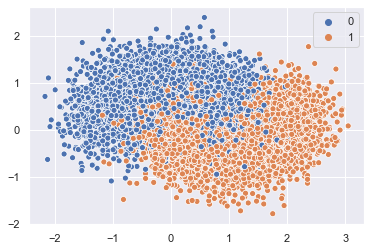

In [7]:
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
import numpy as np
dt_clf = DecisionTreeClassifier()
grid = [{
    'max_leaf_nodes' : [int(x) for x in np.linspace(2, 270, num = 30)],
    'max_depth' : [int(x) for x in np.linspace(2, 50, num = 30)],
}]
search = GridSearchCV(dt_clf, grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
search.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   14.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 5, 6, 8, 10, 11, 13, 15, 16, 18,
                                        20, 21, 23, 25, 26,

In [10]:
best_clf = search.best_estimator_
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
y_pred = best_clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.847

### Grow Forest


In [13]:
ShuffleSplit?

Object `ShuffleSplit` not found.


In [14]:
from sklearn.model_selection import ShuffleSplit
import numpy as np
rs = ShuffleSplit(n_splits=1000, train_size=.0125, random_state=42)
dfs = []
for train_index, test_index in rs.split(X_train):
    df_clf = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=29)
    df_clf.fit(X_train[train_index], y_train[train_index])
    dfs.append(df_clf)

In [15]:
scores = []
for i in range(1000):
    y_pred = dfs[i].predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
np.mean(scores)

0.783258

In [16]:
from scipy import stats
preds = []
for i in range(1000):
    preds.append(dfs[i].predict(X_test))
forest_pred = stats.mode(preds)[0][0]
accuracy_score(y_test, forest_pred)

0.854